In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

sns.set(style="ticks")

In [2]:
sales_data = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Python Case Study\\Case Study-8\\Original file\\SalesData.csv")

In [3]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


##### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [5]:
region_year_wise_sales_data = sales_data.groupby('Region')[['Sales2015', 'Sales2016']].sum()

In [6]:
region_year_wise_sales_data

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


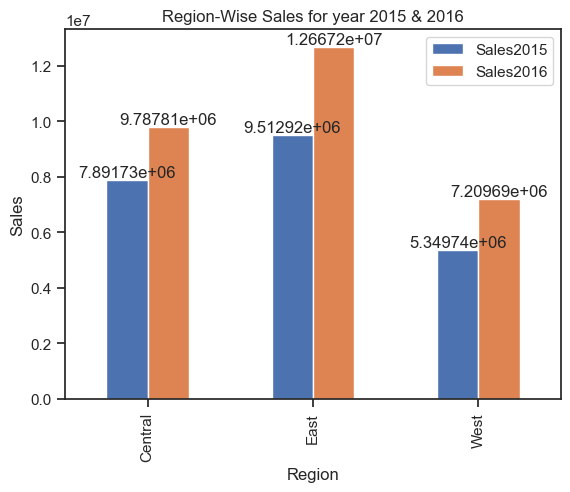

In [7]:
region_year_vizualization = region_year_wise_sales_data.plot(kind = 'bar', ylabel = 'Sales', 
                                                             title = 'Region-Wise Sales for year 2015 & 2016')

plt.bar_label(region_year_vizualization.containers[0])

plt.bar_label(region_year_vizualization.containers[1])

plt.show()

##### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.


In [8]:
region_wise_2016_sales = sales_data.groupby('Region')['Sales2016'].sum()

In [9]:
region_wise_2016_sales

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

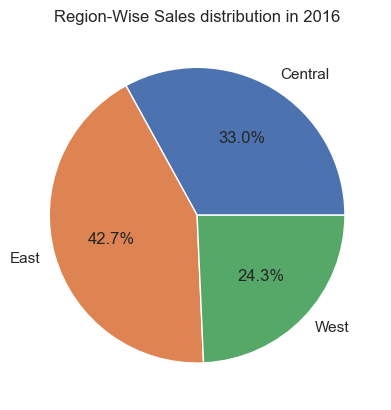

In [10]:
region_wise_2016_sales.plot(kind = 'pie', autopct = '%1.1f%%', ylabel = '', title = 'Region-Wise Sales distribution in 2016')

plt.show()

##### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [11]:
region_tier_wise_sales = pd.pivot_table(data = sales_data, index = 'Region', columns = 'Tier', 
                                        values = ['Sales2015', 'Sales2016'], aggfunc = 'sum')

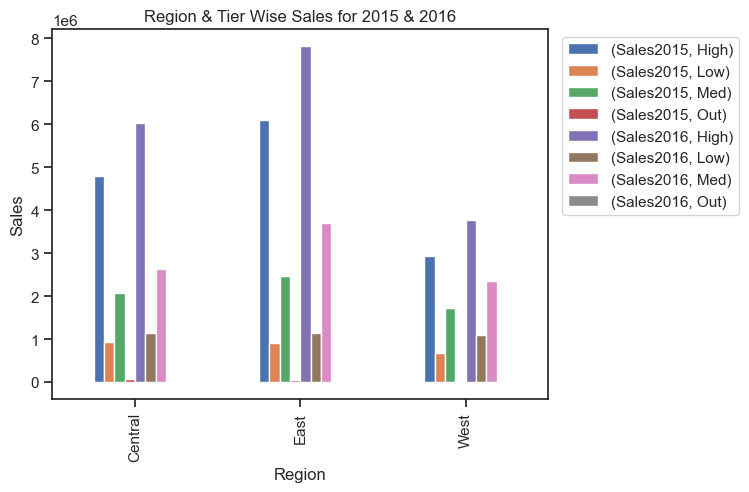

In [12]:
region_tier_wise_sales.plot(kind = 'bar', ylabel = 'Sales', title = 'Region & Tier Wise Sales for 2015 & 2016')

plt.legend(bbox_to_anchor = (1.4, 1))

plt.show()

##### 4. In East region, which state registered a decline in 2016 as compared to 2015?


In [13]:
region_state_wise_sales = sales_data.groupby(['Region', 'State'])[['Sales2015', 'Sales2016']].sum()

In [14]:
region_state_wise_sales = region_state_wise_sales.loc['East']

In [15]:
region_state_wise_sales

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


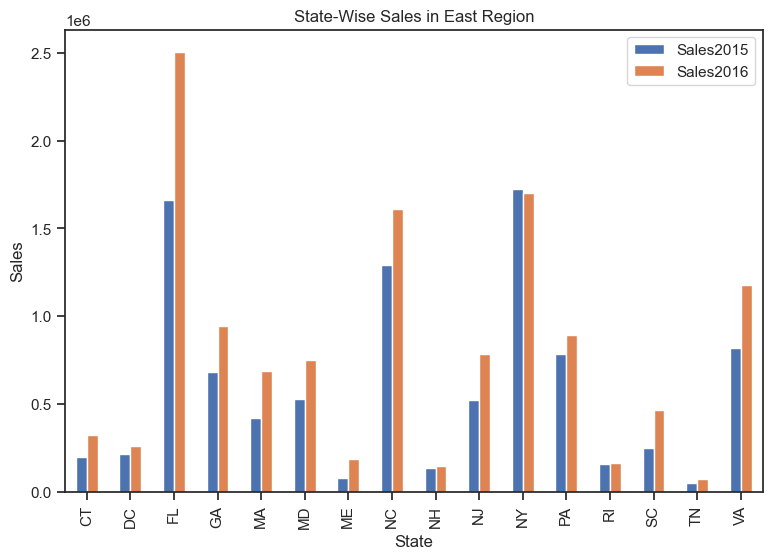

In [16]:
region_state_wise_sales.plot(kind = 'bar', figsize = (9, 6), ylabel = 'Sales', title = 'State-Wise Sales in East Region')

plt.show()

#### NY registered a decline in Sales in 2016 as compared to 2015.

##### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?


In [17]:
tier_division_wise_units_sold = sales_data.groupby(['Tier', 'Division'])[['Units2015', 'Units2016']].sum()

In [18]:
tier_division_wise_units_sold = tier_division_wise_units_sold.loc['High']

In [19]:
tier_division_wise_units_sold

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


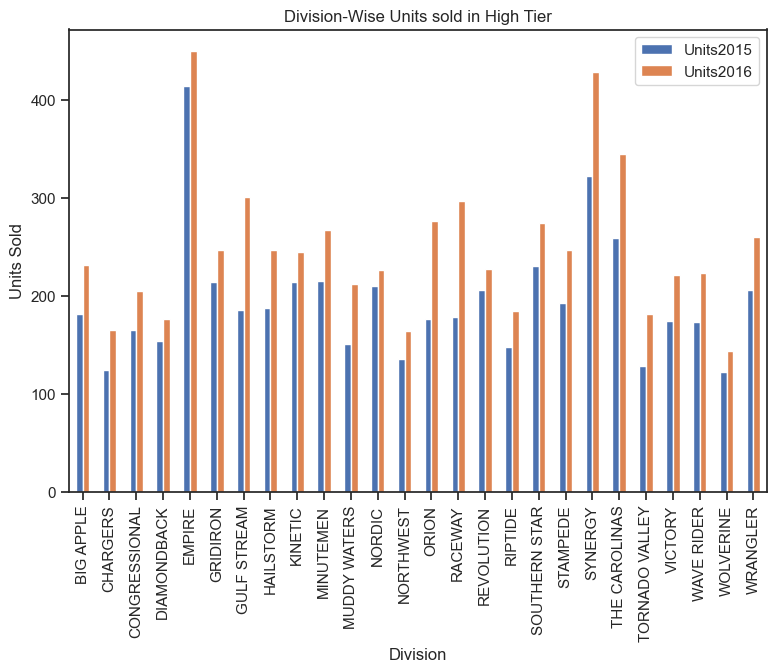

In [20]:
tier_division_wise_units_sold.plot(kind = 'bar', figsize = (9, 6), ylabel = 'Units Sold', 
                                   title = 'Division-Wise Units sold in High Tier')

plt.show()

#### No Division saw a decline in number of units sold in 2016 compared to 2015.

##### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
    • Jan - Mar : Q1
    • Apr - Jun : Q2
    • Jul - Sep : Q3
    • Oct - Dec : Q4 

In [21]:
sales_data['Qtr'] = np.where(sales_data.Month.isin(['Jan', 'Feb', 'Mar']), 'Q1', 
                             np.where(sales_data.Month.isin(['Apr', 'May', 'Jun']), 'Q2', 
                                      np.where(sales_data.Month.isin(['Jul', 'Aug', 'Sep']), 'Q3', 'Q4')))

In [22]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


##### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [23]:
qtr_wise_sales = sales_data.groupby('Qtr')[['Sales2015', 'Sales2016']].sum()

In [24]:
qtr_wise_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


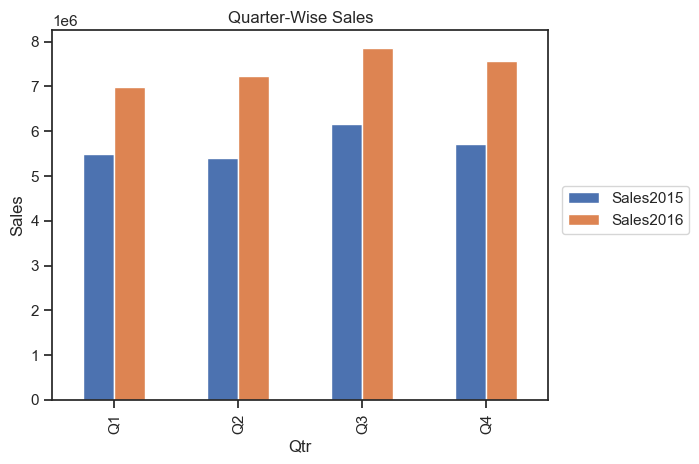

In [25]:
qtr_wise_sales.plot(kind = 'bar', ylabel = 'Sales', title = 'Quarter-Wise Sales')

plt.legend(bbox_to_anchor = (1.3, 0.6))

plt.show()

##### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [26]:
qtr_tier_wise_sales = pd.crosstab(index = sales_data.Tier, columns = sales_data.Qtr, 
                                  values = sales_data.Sales2016, aggfunc = 'sum')

In [27]:
qtr_tier_wise_sales['Q3'] = np.where(qtr_tier_wise_sales.Q3 < 0, 0, qtr_tier_wise_sales.Q3)

In [28]:
qtr_tier_wise_sales

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3867718.595,4.130953e+06,4.872559e+06,4.740002e+06
Low,948832.770,8.905948e+05,7.951777e+05,7.426594e+05
Med,2181401.879,2.215814e+06,2.197058e+06,2.085207e+06
Out,0.000,0.000000e+00,0.000000e+00,0.000000e+00


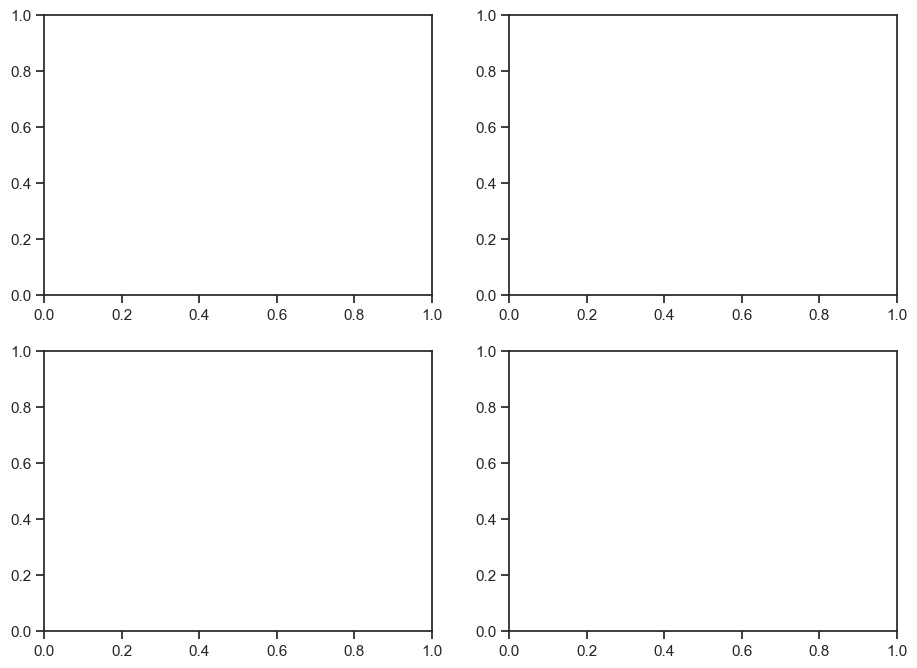

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (11, 8))

In [30]:
qtr_tier_wise_sales.Q1.plot(ax = ax[0, 0], kind = 'pie', autopct = '%1.1f%%', ylabel = 'Sales', title = 'Q1')

qtr_tier_wise_sales.Q2.plot(ax = ax[0, 1], kind = 'pie', autopct = '%1.1f%%', ylabel = 'Sales', title = 'Q2')

qtr_tier_wise_sales.Q3.plot(ax = ax[1, 0], kind = 'pie', autopct = '%1.1f%%', ylabel = 'Sales', title = 'Q3')

qtr_tier_wise_sales.Q4.plot(ax = ax[1, 1], kind = 'pie', autopct = '%1.1f%%', ylabel = 'Sales', title = 'Q4')

fig.suptitle('Composition of Tier-Wise Sales per Quarter in 2016')

plt.show()

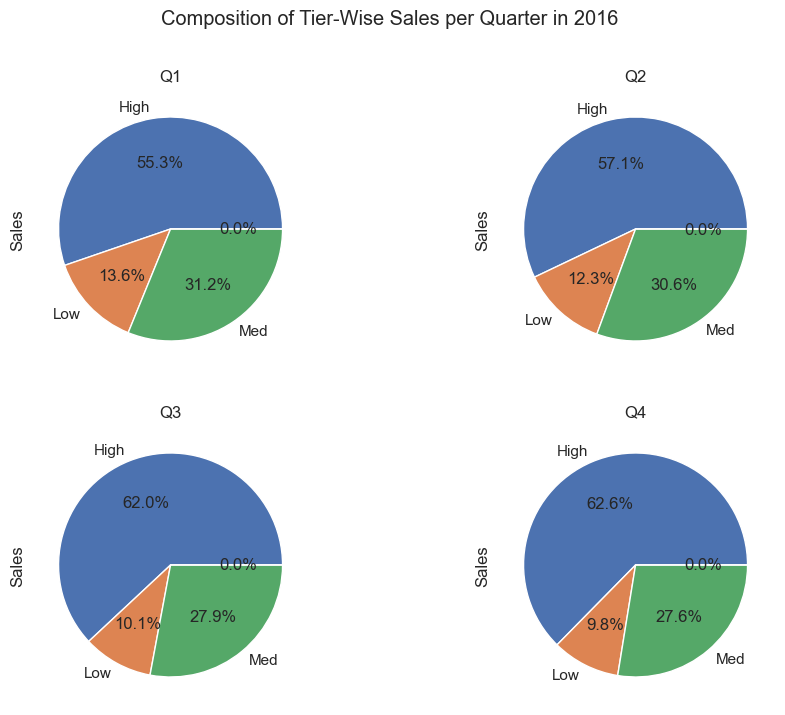

In [31]:
fig